In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [3]:
import seaborn as sns
sns.set(style="white", color_codes =True)

In [4]:
df = pd.read_csv("bank-marketing.csv")

In [5]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.shape

(45211, 19)

In [8]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

 There is no null values present in the dataset

In [9]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [10]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [12]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [13]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [14]:
df["pdays"].median()

-1.0

mean value of pdays = 40.197828

median value of pdays = -1.0

The number of days passed after the client was contacted from previous campaign is -1. It is an oulier as the number of days cannot be negative

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [15]:
df[df['pdays']!= -1]['pdays'].mean()

224.57769165556496

In [16]:
df[df['pdays']!= -1]['pdays'].median()

194.0

After skipping the outlier -1 we can see that the mean and median values are changed to much extentchanged to much extent 

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

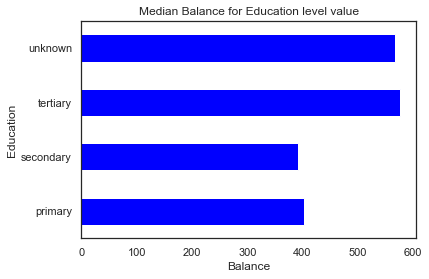

In [17]:
from matplotlib import*
df.groupby('education')['balance'].median().plot.barh(color='blue')
plt.ylabel('Balance')
plt.title('Education(Median of Balance)');
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Median Balance for Education level value');

**Tertiary Education level has the highest median value**

### Make a box plot for pdays. Do you see any outliers?


<AxesSubplot:xlabel='pdays'>

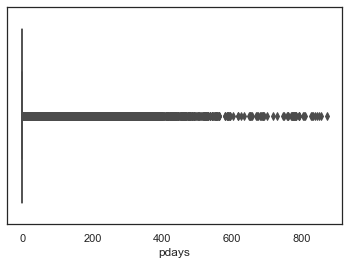

In [18]:
sns.boxplot(df.pdays, orient='v')

There is a lot of outliers present in the pdays column

#### Convert the response variable to a convenient form

In [19]:
df.response.replace({'no':0, 'yes':1}, inplace = True)

### Exploratory Data Analysis

In [20]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


### Make suitable plots for associations with numerical features and categorical features’

<AxesSubplot:>

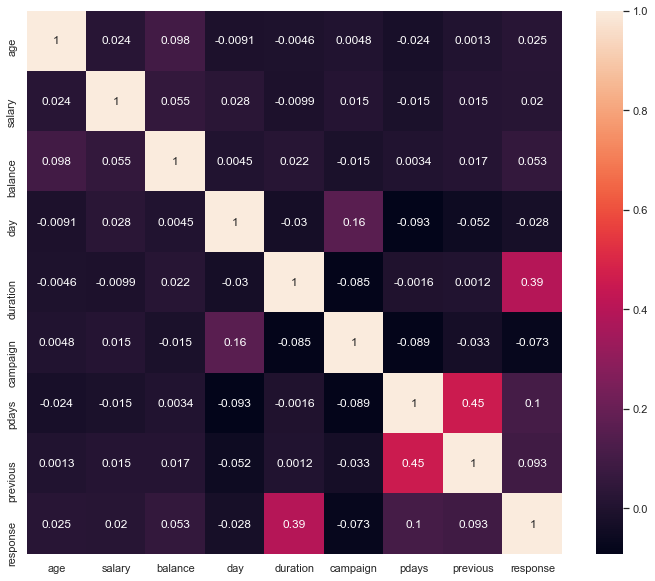

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot= True)

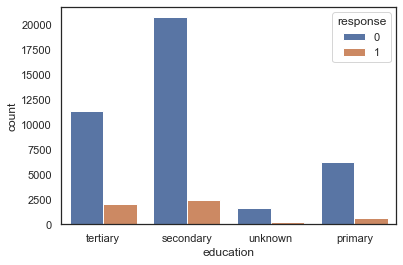

In [22]:
sns.countplot(df['education'], hue = df['response']);

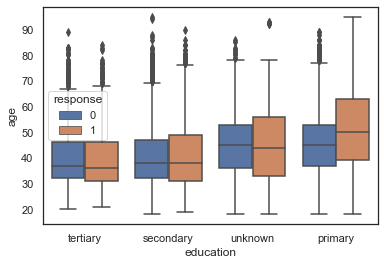

In [23]:
sns.boxplot(df['education'],df['age'], hue=df['response']);

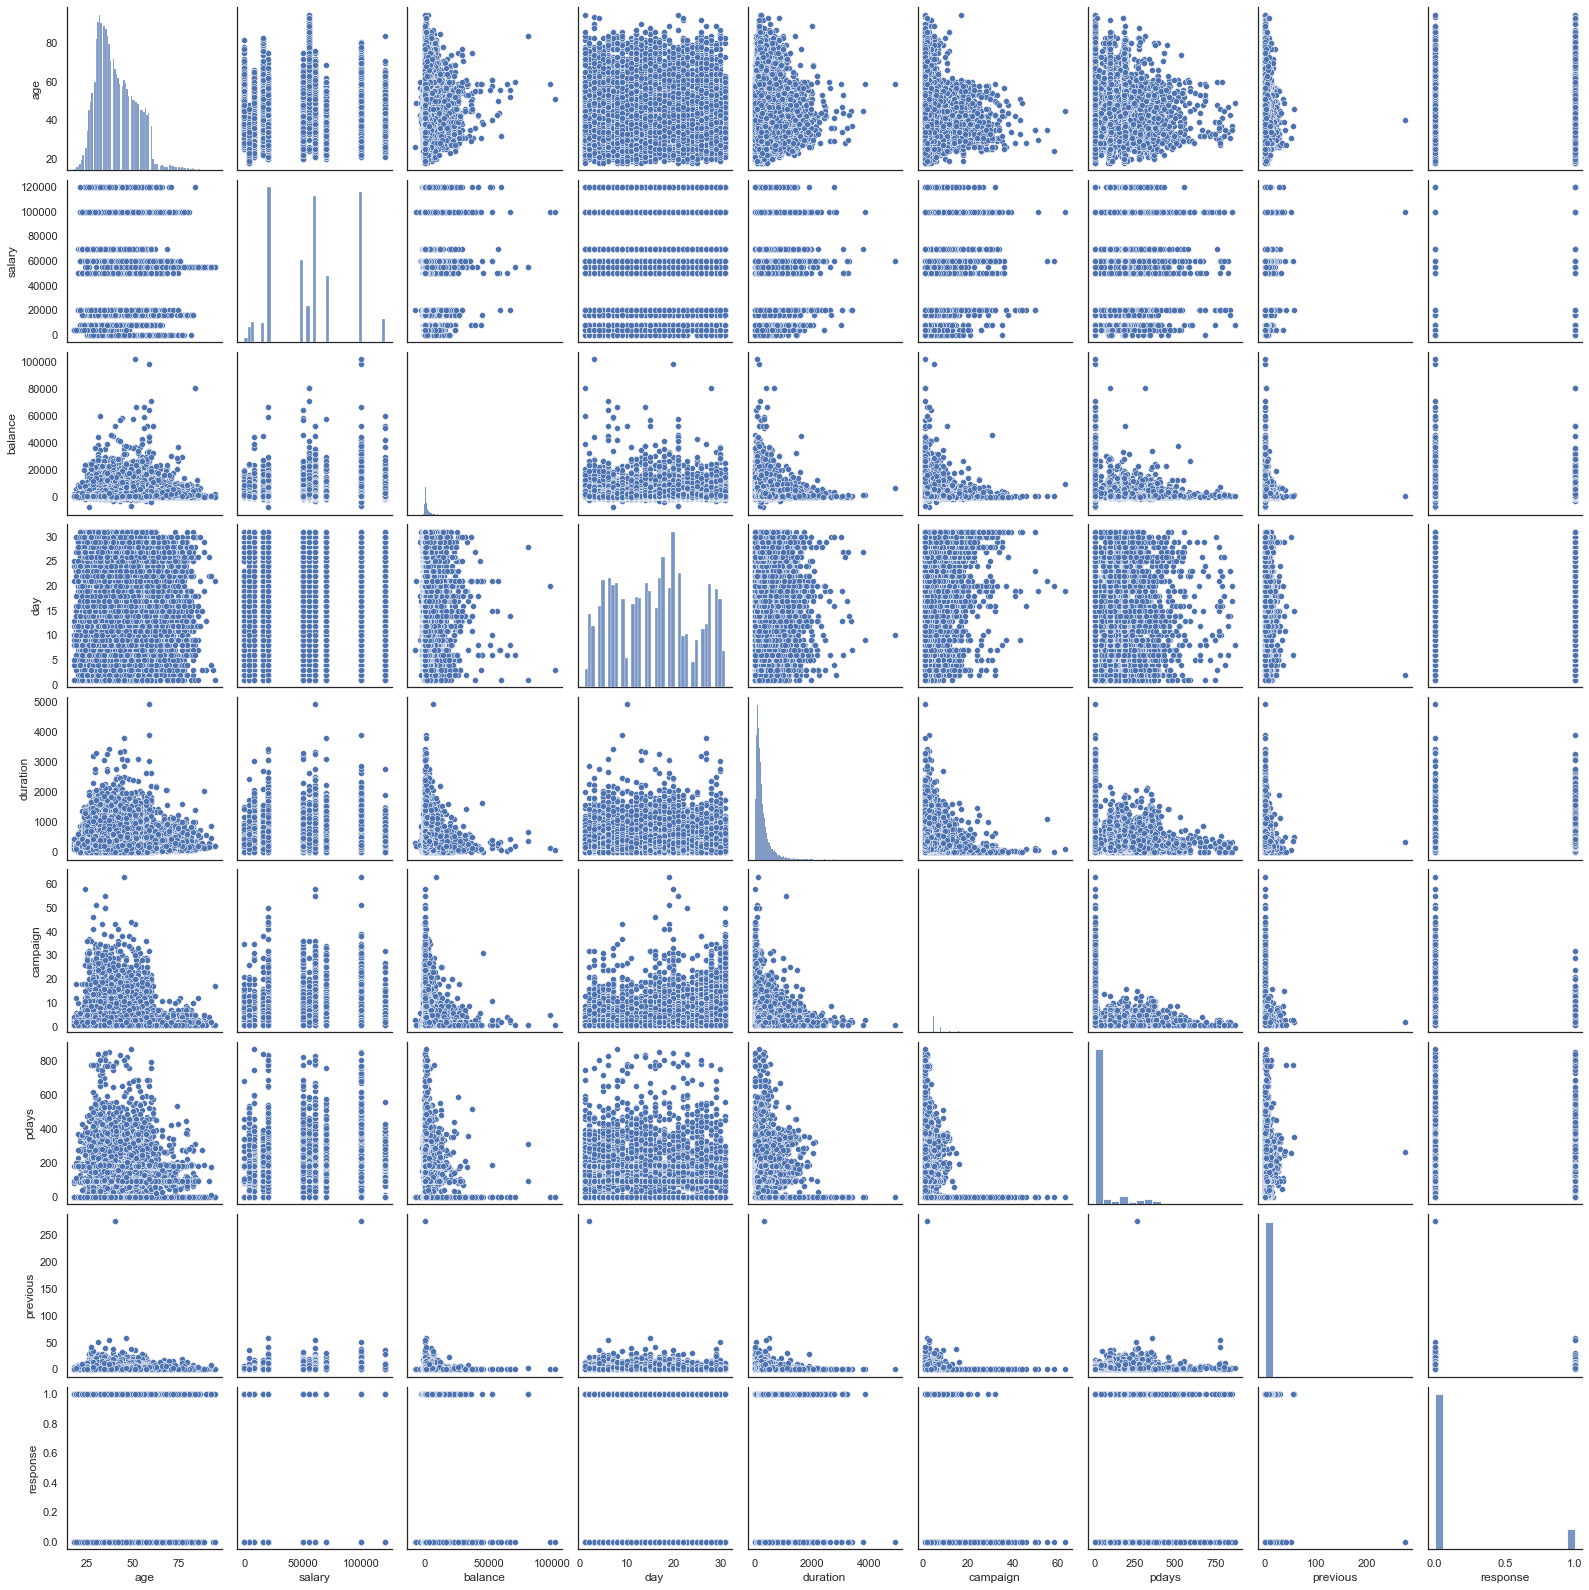

In [24]:
sns.pairplot(df)

<AxesSubplot:xlabel='response', ylabel='count'>

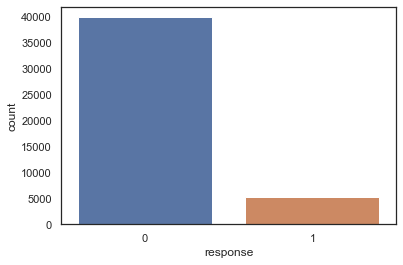

In [25]:
sns.countplot(x='response', data = df)

<AxesSubplot:xlabel='count', ylabel='job'>

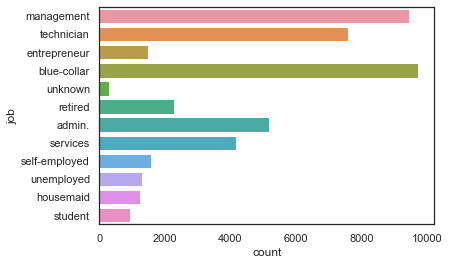

In [26]:
sns.countplot(y='job', data = df)

<AxesSubplot:xlabel='marital', ylabel='count'>

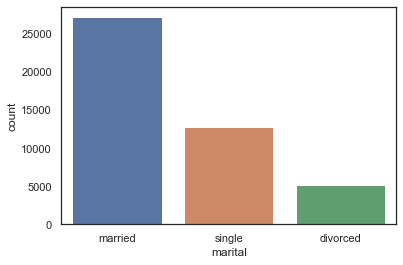

In [27]:
sns.countplot(x='marital', data =df)

<AxesSubplot:xlabel='education', ylabel='count'>

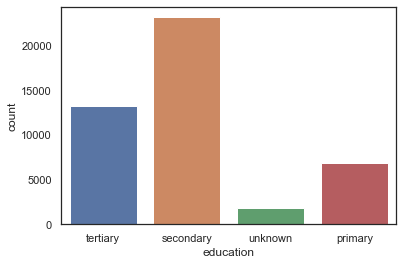

In [28]:
sns.countplot(x='education', data= df)

### Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision

In [29]:
categorical_columns = [column for column in df.columns[:-1] if df[column].dtype == "O"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [30]:
for column in categorical_columns:
    print(column, "-", df[column].unique())

job - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital - ['married' 'single' 'divorced']
education - ['tertiary' 'secondary' 'unknown' 'primary']
targeted - ['yes' 'no']
default - ['no' 'yes']
housing - ['yes' 'no']
loan - ['no' 'yes']
contact - ['unknown' 'cellular' 'telephone']
month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome - ['unknown' 'failure' 'other' 'success']


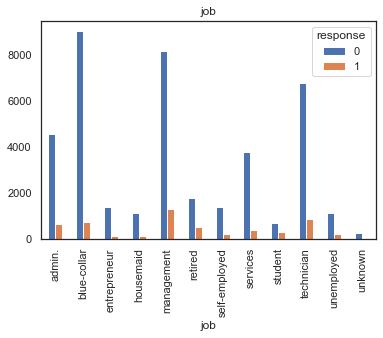

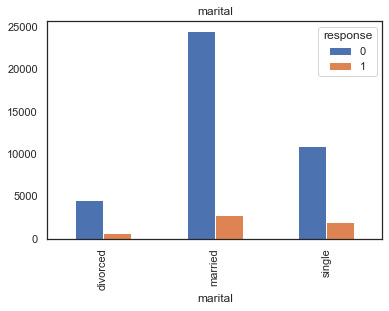

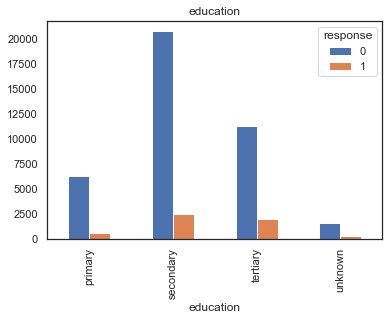

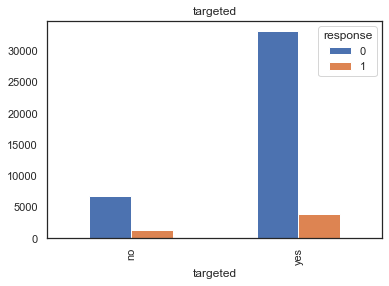

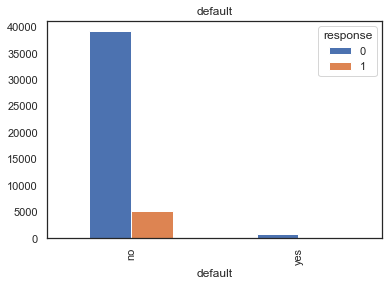

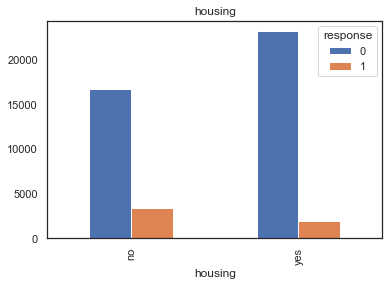

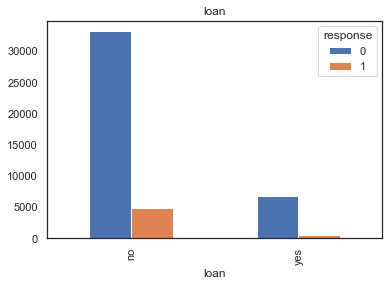

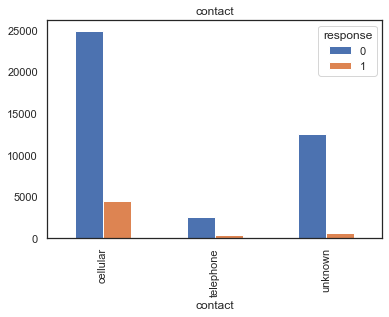

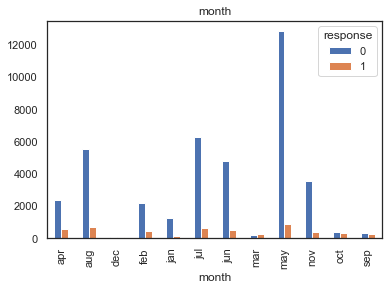

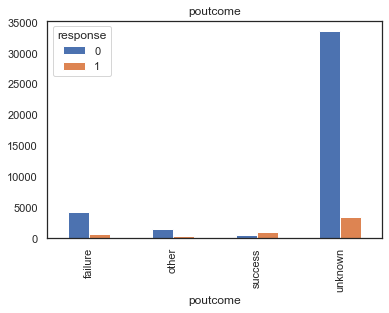

In [31]:
for column in categorical_columns:
    pd.crosstab(df[column],df['response']).plot.bar()
    plt.title(column)

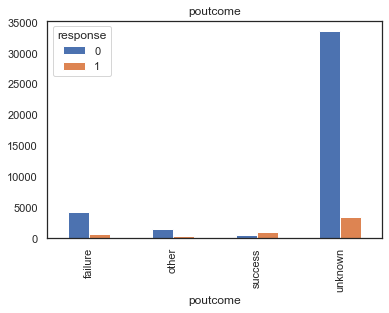

In [32]:
pd.crosstab(df['poutcome'],df['response']).plot.bar()
plt.title('poutcome');

**poutcome is not associated with the pdays column as it has more than 80% of the missing values.**

In [33]:
df.drop('poutcome', axis=1, inplace= True)

In [34]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [35]:
df['previous'].value_counts().head()

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

In [36]:
df['pdays_no_contact'] = np.where(df['pdays']== -1,1,0)
df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

As the majority of the users were not contacted preiously
so I created a new column and now capturing the importance of missing values

Handling the missing values

In [37]:
categorical_columns

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [38]:
for column in categorical_columns[:-1]:
    print(df[column].value_counts(),"\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

yes    37091
no      8120
Name: targeted, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 



We can clearly see from the above data . The missing values are represented as Unknown which is a bettre way to handle missing data by becoming a new category itself rather than imputing it with the mode of the particular column

**Handling Outliers in the Data**

In [39]:
num =[col for col in df.columns if col not in categorical_columns]
print(num)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'pdays_no_contact']


#Display numerical feature distribution

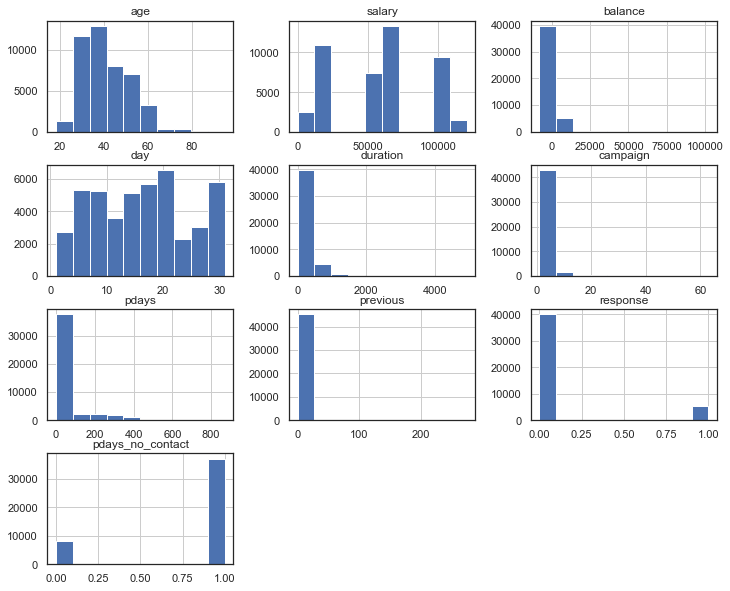

In [40]:
dist = df.hist(figsize=(12,10))

Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

In [41]:
upper_boundary = df['age'].mean() + 3* df['age'].std()
lower_boundary = df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(upper_boundary), print(df['age'].mean())

9.079924091402077
72.79249633725466
40.93621021432837


(None, None, None)

In [42]:
index = df[(df['age']> upper_boundary) | (df['age']< lower_boundary)].index
df.drop(index = index, axis = 0, inplace = True)

In [43]:
df[(df['age']> upper_boundary) | (df['age']< lower_boundary)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


Assuming Balance follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
Lets compute the Interquantile range to calculate the boundaries

In [44]:
IQR = df.balance.quantile(0.75)-df.balance.quantile(0.25)

lower_bridge = df['balance'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['balance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1940.5
3423.5


In [45]:
df[(df['balance']> upper_bridge)| (df['balance']< lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
34,51,management,100000,married,tertiary,yes,no,10635,yes,no,unknown,5,may,336,1,-1,0,0,1
65,51,management,100000,married,tertiary,yes,no,6530,yes,no,unknown,5,may,91,1,-1,0,0,1
69,35,blue-collar,20000,single,secondary,yes,no,12223,yes,yes,unknown,5,may,177,1,-1,0,0,1
70,57,blue-collar,20000,married,secondary,yes,no,5935,yes,yes,unknown,5,may,258,1,-1,0,0,1
186,40,services,70000,divorced,unknown,no,no,4384,yes,no,unknown,5,may,315,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,60,services,70000,married,secondary,yes,no,4428,no,no,cellular,9,nov,125,1,96,6,0,0
45164,35,services,70000,married,tertiary,yes,no,4655,no,no,cellular,9,nov,111,2,-1,0,0,1
45181,46,blue-collar,20000,married,secondary,yes,no,6879,no,no,cellular,15,nov,74,2,118,3,0,0
45185,60,services,70000,married,tertiary,yes,no,4256,yes,no,cellular,16,nov,200,1,92,4,1,0


In [46]:
index = df[(df['balance']> upper_bridge)| (df['balance']< lower_bridge)].index
df.drop(index = index, axis=0, inplace = True)

In [47]:
df[(df['balance']> upper_bridge)| (df['balance']< lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [48]:
df.reset_index(inplace = True)

<AxesSubplot:>

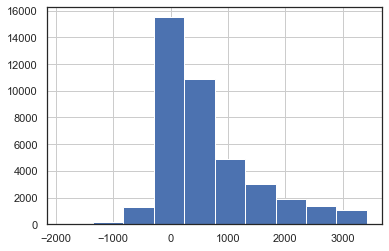

In [49]:
df['balance'].hist()

<AxesSubplot:>

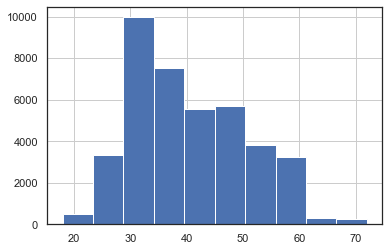

In [50]:
df['age'].hist()

#### Handling Categorical columns

In [51]:
df.head()

,index,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [52]:
df.drop('index', axis =1, inplace = True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [53]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [54]:
dictionary={'jan':1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6, 'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']= df['month'].map(dictionary)

In [55]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [56]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [57]:
df1 = df.copy()
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [58]:
df1 = pd.get_dummies(df1, drop_first= True)
df1.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,response,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,-1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,-1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,-1,0,0,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [59]:
df1.shape

(40121, 33)

In [60]:
df1.loc[df1['pdays']== -1, 'pdays']=0
df1['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

## Feature Selection

Percentage of subscription:  10.926945988385135
Percentage of no subscription:  89.07305401161486


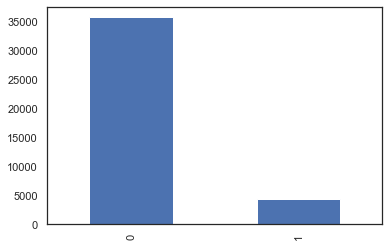

In [61]:
no_sub = len(df[df['response']== 0])
sub = len(df[df['response']== 1])
percent_no_sub =(no_sub/len(df['response']))*100
percent_sub =(sub/len(df['response']))*100

print('Percentage of subscription: ', percent_sub)
print('Percentage of no subscription: ', percent_no_sub)

df['response'].value_counts().plot.bar();

In [62]:
from imblearn.combine import SMOTETomek

In [63]:
x = df1.drop('response', axis =1)
y = df1['response']

In [64]:
from collections import Counter

os = SMOTETomek(1)
x_ns, y_ns = os.fit_sample(x,y)
print("The number of classes before fit  {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

The number of classes before fit  Counter({0: 35737, 1: 4384})
The number of classes after fit Counter({0: 34665, 1: 34665})


In [65]:
y_ns.value_counts()

1    34665
0    34665
Name: response, dtype: int64

In [66]:
y_ns.head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [67]:
x_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


### Feature Selection for Model Development

In [68]:
job ='job_' +df['job'].unique()

In [69]:
job

array(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], dtype=object)

In [70]:
x_ns.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], axis =1, inplace = True)

In [71]:
'marital_' +df['marital'].unique()

array(['marital_married', 'marital_single', 'marital_divorced'],
      dtype=object)

In [72]:
x_ns.drop(['marital_married', 'marital_single'], axis =1, inplace = True)

In [73]:
x_ns.drop(['targeted_yes', 'default_yes'], axis =1, inplace = True)

In [74]:
x_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,1,0,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,1,0,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,0,0,1,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,1,0,0,0,1


In [75]:
x_ns.shape

(69330, 17)

In [76]:
y_ns.shape

(69330,)

## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaler.fit_transform(x_ns)

array([[ 1.75190935,  1.32884065,  1.62669401, ..., -0.33788237,
        -0.19107274,  2.15807385],
       [ 0.38954572,  0.09179734, -0.79816086, ..., -0.33788237,
        -0.19107274,  2.15807385],
       [-0.68088285,  1.9473623 , -0.82913109, ...,  2.95960986,
        -0.19107274,  2.15807385],
       ...,
       [-0.87550622, -0.21746349, -0.63069217, ..., -0.33788237,
        -0.19107274, -0.46337617],
       [ 0.19492234, -0.21746349,  1.20458115, ..., -0.33788237,
        -0.19107274, -0.46337617],
       [ 1.45997428,  1.9473623 , -0.11452155, ..., -0.33788237,
        -0.19107274, -0.46337617]])

In [79]:
X_scaled = pd.DataFrame(scaler.fit_transform(x_ns),columns=x_ns.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.751909,1.328841,1.626694,-1.304338,-0.41494,-0.341934,-0.524117,-0.485424,-0.333211,0.627573,-0.861447,1.676796,-0.159737,1.216467,-0.337882,-0.191073,2.158074
1,0.389546,0.091797,-0.798161,-1.304338,-0.41494,-0.660278,-0.524117,-0.485424,-0.333211,0.627573,1.160837,-0.596376,-0.159737,1.216467,-0.337882,-0.191073,2.158074
2,-0.680883,1.947362,-0.829131,-1.304338,-0.41494,-0.877331,-0.524117,-0.485424,-0.333211,0.627573,1.160837,-0.596376,-0.159737,1.216467,2.959610,-0.191073,2.158074
3,0.681481,-1.145246,0.896026,-1.304338,-0.41494,-0.831026,-0.524117,-0.485424,-0.333211,0.627573,-0.861447,-0.596376,6.260296,1.216467,-0.337882,-0.191073,2.158074
4,-0.680883,-1.763768,-0.830278,-1.304338,-0.41494,-0.524259,-0.524117,-0.485424,-0.333211,0.627573,-0.861447,-0.596376,6.260296,-0.822053,-0.337882,-0.191073,2.158074


## Model Development

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_ns, test_size=0.3, random_state=0)

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [83]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8958 1363]
 [1250 9228]]
0.874368960046156
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10321
           1       0.87      0.88      0.88     10478

    accuracy                           0.87     20799
   macro avg       0.87      0.87      0.87     20799
weighted avg       0.87      0.87      0.87     20799



## Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, X_scaled, y_ns, cv=15)

In [85]:
score

array([0.79511034, 0.82540026, 0.94937257, 0.93098226, 0.91821722,
       0.90069234, 0.90069234, 0.85049762, 0.89614885, 0.84768498,
       0.7061878 , 0.84227607, 0.86282994, 0.88641281, 0.73496322])

In [86]:
score.mean()

0.8564979085532957

## Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 20, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9508  813]
 [ 545 9933]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10321
           1       0.92      0.95      0.94     10478

    accuracy                           0.93     20799
   macro avg       0.94      0.93      0.93     20799
weighted avg       0.93      0.93      0.93     20799

0.9347083994422809


## Hyperparameter Optimization

In [89]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000,15)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(random_grid)

random_grid ={'n_estimators': n_estimators,
             'max_features': max_features,
             'min_samples_split':min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 80, 151, 222, 292, 363, 434, 504, 575, 646, 717, 787, 858, 929, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [90]:
clf_randomcv = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv =3, verbose =2, random_state =100, n_jobs =-1)


# fit the randomized model

clf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=100, verbose=2)

In [91]:
clf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=40, random_state=0)

In [92]:
clf_randomcv.best_score_

0.9315283014980116

In [93]:
clf_randomcv.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'criterion': 'entropy'}

In [94]:
clf_best_random = clf_randomcv.best_estimator_

In [95]:
y_pred = clf_best_random.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[9481  840]
 [ 485 9993]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10321
           1       0.92      0.95      0.94     10478

    accuracy                           0.94     20799
   macro avg       0.94      0.94      0.94     20799
weighted avg       0.94      0.94      0.94     20799

0.9362950141833742


## K-Fold cross validation

In [96]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_best_random,X_scaled,y_ns,cv=15)


In [97]:
score

array([0.7723929 , 0.86520987, 0.95434877, 0.95348334, 0.95651233,
       0.91367373, 0.9407183 , 0.89809606, 0.95737776, 0.87927304,
       0.81566421, 0.658373  , 0.89268715, 0.90848118, 0.67113804])

In [98]:
score.mean()

0.8691619789412953

**Random Forest Performs much better as its average accuracy score is 87.3% to that of Logistic regression which has an accuracy of 85.8%.**

**Here accuracy is used as a metric to compare because here the imbalanced data is handled, It it would be imbalanced then F1- score will be used.**